<a href="https://colab.research.google.com/github/nandita2291/Medusa/blob/main/waste_segregation_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING MODEL FOR MEDICAL WASTE SEGREGATION

1. IMPORTING REQUIRED LIBRARIES

numpy= numerical python for numerical operations

matplotlib= plotting the evaluation plots

tensorflow= deep learning framework

sequential= for building a base model

import all the pretrained models and layers

import the image fucntion to preprocess the data before classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# 2. MOUNTING THE DRIVE

Since the dataset is available in google drive, we have to mount the drive onto colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. DATA PREPROCESSING 

The dataset contains about 1000 images related to chemical, sharp and infectious classes of medical wastes. 

Using image data generator we perform data augmentation by applying the specified transforms.

In [23]:
train_dir= image.ImageDataGenerator(height_shift_range=0.1,width_shift_range=0.1,rotation_range=25,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_dir= image.ImageDataGenerator(height_shift_range=0.1,width_shift_range=0.1,rotation_range=25,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

# 4. DATA ADDRESSING

We need to develop train and test sets. This is done by developing directories after applying the augmentation on the raw image dataset.

In [47]:
train_set= train_dir.flow_from_directory(
    '/content/drive/MyDrive/waste_segregation/train',
    batch_size=8,
    class_mode='categorical',
    target_size=(224,224)
)
test_set= test_dir.flow_from_directory(
    '/content/drive/MyDrive/waste_segregation/validation',
    shuffle=False,
    batch_size=8,
    class_mode='categorical',
    target_size=(224,224)
)

Found 807 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


In [46]:
train_set.class_indices

{'chemical': 0, 'infectious': 1, 'sharp': 2}

# 4. MODEL BUILDING

We have imported the MobileNetV2 model pretrained on imagenet dataset. We remove the top and bottom layers from it. We froze those layers, so these do not participate in training. 

We added our own customized layers as a strategy to overcome overfitting. 

gaussianoise- adding noise to data improves the robustness

batchnormalization- normalizes after each layer batch wise

dropout- randomly cuts off neural connections to reduce model complexity

In short, we have developed a mobilenetv2 based CNN using transfer learning.

In [51]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(750,activation='relu'))
model.add(BatchNormalization()) 
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 gaussian_noise_20 (Gaussian  (None, 7, 7, 1280)       0         
 Noise)                                                          
                                                                 
 global_average_pooling2d_7   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_22 (Dense)            (None, 750)               960750    
                                                                 
 batch_normalization_13 (Bat  (None, 750)              3000      
 chNormalization)                                    

In [ ]:
!pip install sckit-plot

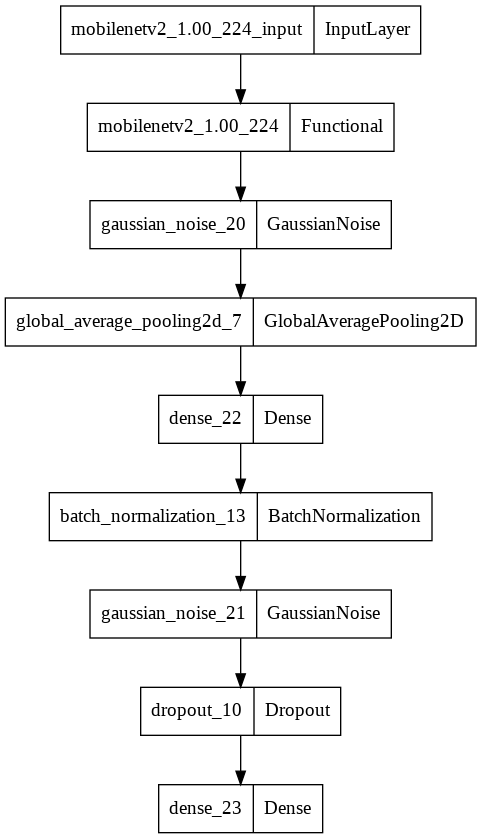

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

with the help of transfer learning, we need to train around 1 million parameters only. This greatly conserves the training time.

# 5.MODEL COMPILATION

the built model is compiled using adam optimizer, crossentropy loss function and some metrics.

loss function- calculates the loss/error (truth-prediction)

optimiser- keeps a track of loss fucntion and tries to minimise it.

metrics- to evaluate the performance of the model



METRICS USED

*  Accuracy- ratio of correct predictions to the total predictions
*  Precision- ratio of true positives to sum of true and false positives
*  Recall- ratio of true positives to sum of true positives and false negatives
*  AUC- Area under the curve of precision and recall







In [52]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall','AUC'])

# 6. MODEL TRAINING
we need to train the model with the image dataset. We train it for 10 epochs. The steps per epoch is calculated by dividing training images by the batch size.

steps_per_epoch= (training images)/batch size

In [61]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=5)
history=model.fit(
    train_set,
    epochs=10,
    steps_per_epoch= 90,
    validation_data= test_set
)

Epoch 1/10
23/90 [======>.......................] - ETA: 9s - loss: 0.5004 - accuracy: 0.8098 - precision: 0.8208 - recall: 0.7717 - auc: 0.9357

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


90/90 [==============================] - 17s 192ms/step - loss: 0.4979 - accuracy: 0.8039 - precision: 0.8127 - recall: 0.7663 - auc: 0.9341 - val_loss: 0.6819 - val_accuracy: 0.7546 - val_precision: 0.7794 - val_recall: 0.7361 - val_auc: 0.8946
Epoch 2/10
90/90 [==============================] - 17s 191ms/step - loss: 0.4511 - accuracy: 0.8331 - precision: 0.8567 - recall: 0.8067 - auc: 0.9460 - val_loss: 0.6237 - val_accuracy: 0.7778 - val_precision: 0.7961 - val_recall: 0.7593 - val_auc: 0.9088
Epoch 3/10
90/90 [==============================] - 17s 186ms/step - loss: 0.5272 - accuracy: 0.7969 - precision: 0.8284 - recall: 0.7719 - auc: 0.9281 - val_loss: 1.0554 - val_accuracy: 0.6111 - val_precision: 0.6275 - val_recall: 0.5926 - val_auc: 0.8114
Epoch 4/10
90/90 [==============================] - 17s 186ms/step - loss: 0.5077 - accuracy: 0.8081 - precision: 0.8267 - recall: 0.7761 - auc: 0.9329 - val_loss: 0.6410 - val_accuracy: 0.7870 - val_precision: 0.7981 - val_recall: 0.7685 -

#7. MODEL EVAUATION

The model has secured the following results:-


TRAINING ACCURACY- 85.6%

TRAINING LOSS- 0.3822

TRAINING PRECISION- 86.14%

TRAINING RECALL- 84.76%

TRAINING AUC- 0.9610

In [62]:
model.evaluate(train_set)

 43/101 [===========>..................] - ETA: 8s - loss: 0.3983 - accuracy: 0.8314 - precision: 0.8378 - recall: 0.8256 - auc: 0.9584

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


101/101 [==============================] - 14s 141ms/step - loss: 0.3823 - accuracy: 0.8563 - precision: 0.8615 - recall: 0.8476 - auc: 0.9610


[0.38227880001068115,
 0.8562577366828918,
 0.8614609837532043,
 0.8475836515426636,
 0.9609864950180054]

The model has secured the following results:-


VALIDATION ACCURACY- 76.8%

VALIDATION LOSS- 0.8384

VALIDATION PRECISION- 78.64%

VALIDATION RECALL- 75.00%

VALIDATION AUC- 0.8833

In [63]:
model.evaluate(test_set)

27/27 [==============================] - 4s 158ms/step - loss: 0.8385 - accuracy: 0.7685 - precision: 0.7864 - recall: 0.7500 - auc: 0.8833


[0.8384926915168762,
 0.7685185074806213,
 0.7864077687263489,
 0.75,
 0.8832786083221436]

Plotting the ROC

we are plotting the AUC-ROC for the individual classes. AUC-ROC refers to area under the regional operating characteristics curve. 

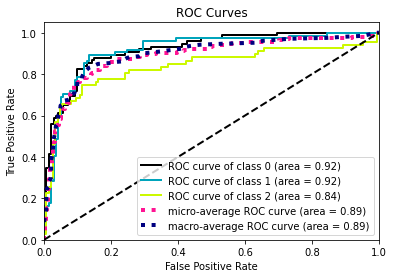

<Figure size 3600x360 with 0 Axes>

In [67]:
import scikitplot 
%matplotlib inline

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
y_probas = model.predict(test_set)
scikitplot.metrics.plot_roc(test_set.classes, y_probas)
plt.figure(figsize=(50, 5)) 
#plt.legend(fontsize = 'xx-small')
plt.show()

# 8. MODEL PREDICTION

In this part, we take an image from the validation set and look into the prediction of the model. The softmax activation function returns an array with values representing the probability of each class. The maximum value pertains to the class for which the image.

the image belongs to Infectious category


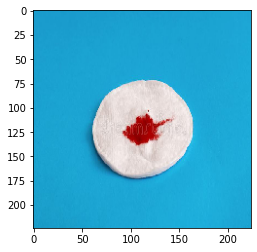

In [103]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/waste_segregation/validation/infectious/1 (23).jpeg',target_size=(224,224))
imag = image.img_to_array(img)
image = np.expand_dims(img,axis=0)   ### flattening
ypred = model.predict(image)
a=np.argmax(ypred,-1)
plt.imshow(img)
if a==[0]: 
    y='Chemical' 
elif a==[1]: 
    y='Infectious' 
elif a==[2]: 
    y='Sharp'
print('the image belongs to ' +str(y)+' category')

finally, we save the trained model.

In [68]:
model.save('waste_segregator.h5')